In [1]:
# USE_MP=False
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


In [2]:
ELR_parameter.setup(samples=30, data_manager=data_manager_raw)
data = qc.Loop(dummy_parameter[0:3:1]).each(ELR_parameter).run(name='ELR_parameter')

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-11-15/#011_ELR_parameter_11-08-11'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | dummy_set      | dummy          | (3,)
   Measured | fidelity_empty | fidelity_empty | (3,)
   Measured | fidelity_load  | fidelity_load  | (3,)
   Measured | fidelity_read  | fidelity_read  | (3,)
   Measured | up_proportion  | up_proportion  | (3,)
   Measured | dark_counts    | dark_counts    | (3,)
   Measured | contrast       | contrast       | (3,)
started at 2016-11-15 11:08:14


<IPython.core.display.Javascript object>


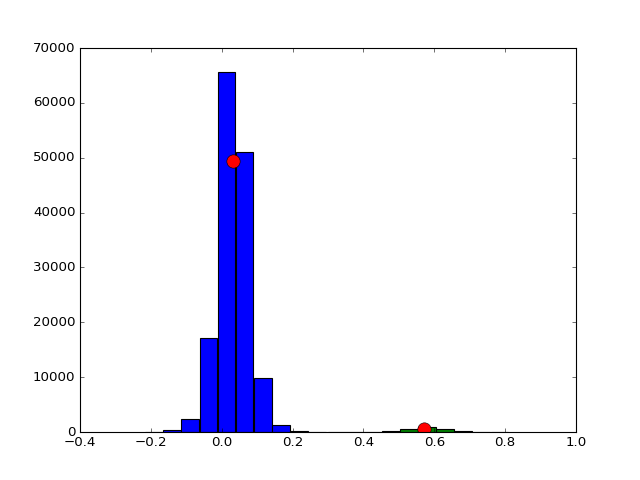

In [3]:
ELR_parameter.setup(samples=30)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)

In [8]:
steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=30, t_max_wait=200, t_buffer=40)
steered_controller.record_initialization_traces(True)

load_pulse = DCPulse(name='load', amplitude=1, duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0, duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0, duration=2)
pulse_sequence = PulseSequence([steered_initialization, load_pulse, read_pulse, final_pulse])

layout.target_pulse_sequence(pulse_sequence)
layout.setup(samples=10, readout_threshold_voltage=threshold_voltage)

<IPython.core.display.Javascript object>


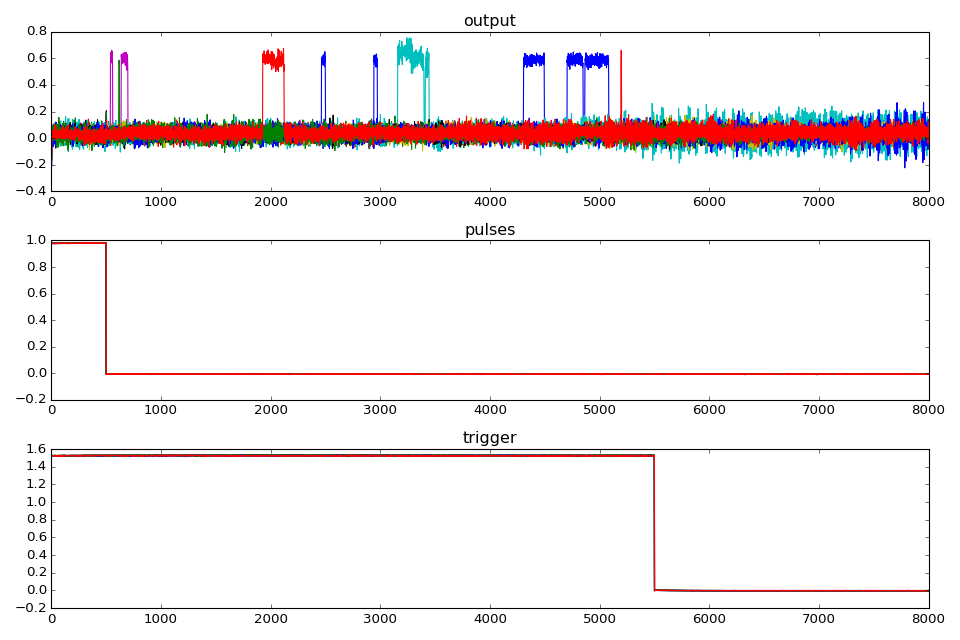

In [9]:
result = layout.do_acquisition(return_dict=True)

fig, axes = plt.subplots(3,1, figsize=(12,8))
for (ch_name, traces), ax in zip(result.items(), axes):
    ax.plot(traces.transpose())
    ax.set_title(ch_name)
plt.tight_layout()

<IPython.core.display.Javascript object>


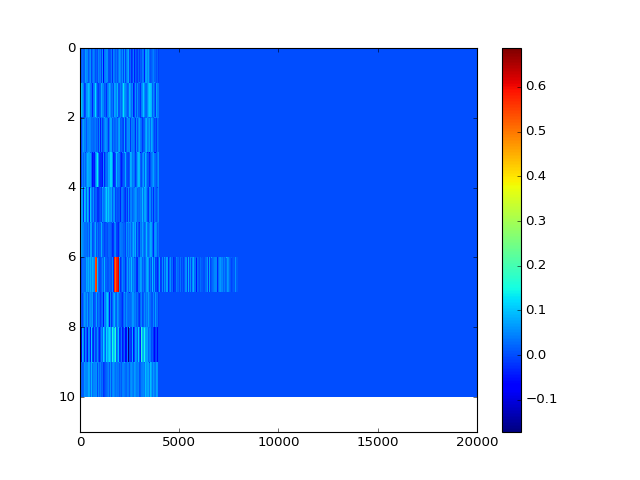

In [10]:
plot_traces(steered_controller.initialization_traces())

<IPython.core.display.Javascript object>


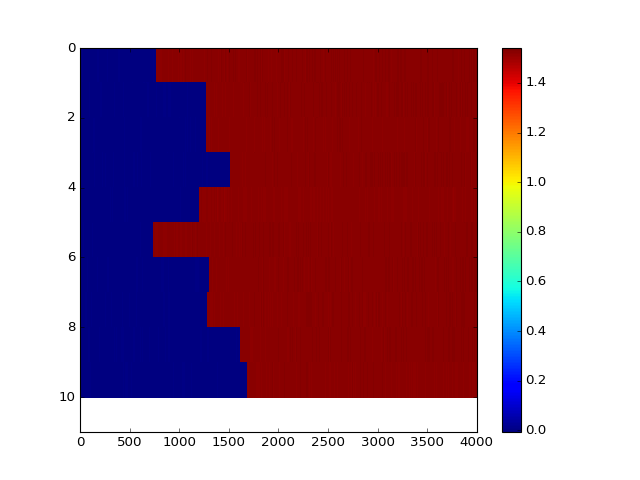

In [13]:
plot_traces(steered_controller.post_initialization_traces()['B'])

# For PyCharm console

In [ ]:
USE_MP=False
import silq
silq.initialize("EWJN")


ELR_parameter.setup(samples=50)
ELR_parameter()
traces_read = ELR_parameter.trace_segments['output']['read']
_, _, threshold_voltage = analysis.find_high_low(traces_read, plot=True)


steered_initialization = SteeredInitialization(name='steered_initialization',
                                               t_no_blip=50, t_max_wait=200, t_buffer=5)
load_pulse = DCPulse(name='load', amplitude=1.5,
                     duration=5, acquire=True)
read_pulse = DCPulse(name='read', amplitude=0,
                      duration=50, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0,
                      duration=2)
pulses = [steered_initialization, load_pulse, read_pulse, final_pulse]
pulse_sequence = PulseSequence(pulses=pulses)

layout.target_pulse_sequence(pulse_sequence)

layout.setup(samples=3,
             readout_threshold_voltage=threshold_voltage)